In [1]:
!pip install yfinance

In [3]:
import yfinance as yf # yahoo finance 套件
import pandas as pd # 結構化資料處理套件
import datetime as dt # 時間套件

In [4]:
# 輸入股票代號
stock_id = "TQQQ"
# stock_id = "2357.tw"
# stock_id = "AAPL"
# stock_id = "NVDA"

'''今天往前算幾天'''
# 資料結束時間
end = dt.date.today()
# 抓取半年資料（現在-過去180天）
start = end - dt.timedelta(days=360)

'''抓取特定時間'''
# start = dt.datetime(2025, 1, 1)  # 指定的開始日期
# end = dt.datetime(2025, 9, 21)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
df = yf.download(stock_id, start=start, end=end).reset_index()

# 刪除 Ticker 欄位並取代
df.columns = df.columns.droplevel('Ticker')

df

/tmp/ipython-input-2508554826.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_id, start=start, end=end).reset_index()
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
0,2024-09-26,72.529991,74.393035,70.934509,74.244386,53501600
1,2024-09-27,71.281357,72.995760,70.746225,72.956119,41465300
2,2024-09-30,71.836304,71.965136,69.547137,70.815593,42931400
3,2024-10-01,68.793983,71.776842,67.089493,71.628193,67380100
4,2024-10-02,69.051643,69.903889,67.257968,68.387687,39559700
...,...,...,...,...,...,...
241,2025-09-15,99.230003,99.269997,97.570000,97.639999,39057200
242,2025-09-16,98.959999,99.809998,98.610001,99.669998,38568600
243,2025-09-17,98.330002,99.199997,95.510002,98.889999,73848600
244,2025-09-18,100.980003,102.370003,99.790001,100.760002,61700800


In [15]:
# 計算8日 SMA
df['5_SMA'] = df['Close'].rolling(window=5).mean()

# 計算13日 SMA
df['20_SMA'] = df['Close'].rolling(window=60).mean()

# 計算20日 SMA
df['60_SMA'] = df['Close'].rolling(window=60).mean()

# 列印最後筆數
df.tail()

Price,Date,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,...,RS,RSI,EMA_8,EMA_13,MACD,EMA_5,EMA_20,EMA_26,5_SMA,60_SMA
241,2025-09-15,99.230003,99.269997,97.570000,97.639999,39057200,94.488750,92.707692,87.808187,2.470001,...,2.715305,73.084311,94.994841,93.724625,3.179972,94.994841,93.724625,91.814868,95.888000,87.808187
242,2025-09-16,98.959999,99.809998,98.610001,99.669998,38568600,95.418750,93.316923,88.253391,-0.270004,...,2.414262,70.711093,95.875987,94.472536,3.531850,95.875987,94.472536,92.344137,96.902000,88.253391
243,2025-09-17,98.330002,99.199997,95.510002,98.889999,73848600,96.232500,93.750000,88.650699,-0.629997,...,2.118099,67.929176,96.421324,95.023602,3.633789,96.421324,95.023602,92.787535,97.770001,88.650699
244,2025-09-18,100.980003,102.370003,99.790001,100.760002,61700800,97.213751,94.643846,89.035666,2.650002,...,2.269940,69.418402,97.434364,95.874517,4.039979,97.434364,95.874517,93.394384,98.852002,89.035666
245,2025-09-19,102.980003,103.290001,101.150002,101.879997,42035100,98.350001,95.866923,89.443999,2.000000,...,5.283019,84.084085,98.666728,96.889586,4.562298,98.666728,96.889586,94.104430,100.096002,89.443999


In [16]:
# 計算每個交易日的價格變動，即當天收盤價與前一天收盤價的差異
df['Change'] = df['Close'] - df['Close'].shift(1)

# 將變動值中的正數部分視為“Gain”（增益），如果變動為負則記為0
df['Gain'] = df['Change'].apply(lambda x: x if x > 0 else 0)

# 將變動值中的負數部分視為“Loss”（損失），取其絕對值，如果變動為正則記為0
df['Loss'] = df['Change'].apply(lambda x: abs(x) if x < 0 else 0)

df.tail()

# 計算過去14個交易日的平均增益
df['Avg Gain'] = df['Gain'].rolling(window=14).mean()

# 計算過去14個交易日的平均損失
df['Avg Loss'] = df['Loss'].rolling(window=14).mean()

# 計算相對強弱指數的相對強度（RS），即平均增益與平均損失的比值
df['RS'] = df['Avg Gain'] / df['Avg Loss']

# 計算相對強弱指數（RSI），使用RS公式計算出來
df['RSI'] = 100 - (100 / (1 + df['RS']))

# 顯示最後幾行的數據
df.tail()

Price,Date,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,...,RS,RSI,EMA_8,EMA_13,MACD,EMA_5,EMA_20,EMA_26,5_SMA,60_SMA
241,2025-09-15,99.230003,99.269997,97.570000,97.639999,39057200,94.488750,92.707692,87.808187,2.470001,...,2.715305,73.084311,94.994841,93.724625,3.179972,94.994841,93.724625,91.814868,95.888000,87.808187
242,2025-09-16,98.959999,99.809998,98.610001,99.669998,38568600,95.418750,93.316923,88.253391,-0.270004,...,2.414262,70.711093,95.875987,94.472536,3.531850,95.875987,94.472536,92.344137,96.902000,88.253391
243,2025-09-17,98.330002,99.199997,95.510002,98.889999,73848600,96.232500,93.750000,88.650699,-0.629997,...,2.118099,67.929176,96.421324,95.023602,3.633789,96.421324,95.023602,92.787535,97.770001,88.650699
244,2025-09-18,100.980003,102.370003,99.790001,100.760002,61700800,97.213751,94.643846,89.035666,2.650002,...,2.269940,69.418402,97.434364,95.874517,4.039979,97.434364,95.874517,93.394384,98.852002,89.035666
245,2025-09-19,102.980003,103.290001,101.150002,101.879997,42035100,98.350001,95.866923,89.443999,2.000000,...,5.283019,84.084085,98.666728,96.889586,4.562298,98.666728,96.889586,94.104430,100.096002,89.443999


In [17]:
'''
第一日
# 平滑係數公式： α = 2 / (span + 1) = 2 / (span + 1)
# α = 2 / (8 + 1) = 2 / (8 + 1) ≈ 0.2222
# 0.2222 * 770.0 + (1-0.2222) * 776.0 = 171.094 + 603.5728 = 774.6668
'''

# 計算8天的指數移動平均線（EMA），並將其存儲在 'EMA_8' 列中
# adjust=False 表示在計算 EMA 時，只考慮當前值和前一個 EMA 的遞歸計算方式，而不考慮所有歷史數據
df['EMA_5'] = df['Close'].ewm(span=8, adjust=False).mean()

# 計算13天的指數移動平均線（EMA），並將其存儲在 'EMA_13' 列中
df['EMA_20'] = df['Close'].ewm(span=13, adjust=False).mean()

# Calculate the 26-day EMA and store it in the 'EMA_26' column
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()


# 計算MACD線：8天EMA減去13天EMA，並將其存儲在 'MACD' 列中
df['MACD'] = df['EMA_5'] - df['EMA_26']

# 顯示DataFrame的最後幾行數據
df.head(3)

Price,Date,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,...,RS,RSI,EMA_8,EMA_13,MACD,EMA_5,EMA_20,EMA_26,5_SMA,60_SMA
0,2024-09-26,72.529991,74.393035,70.934509,74.244386,53501600,NaN,NaN,NaN,NaN,...,NaN,NaN,72.529991,72.529991,0.000000,72.529991,72.529991,72.529991,NaN,NaN
1,2024-09-27,71.281357,72.995760,70.746225,72.956119,41465300,NaN,NaN,NaN,-1.248634,...,NaN,NaN,72.252517,72.351615,-0.184983,72.252517,72.351615,72.437500,NaN,NaN
2,2024-09-30,71.836304,71.965136,69.547137,70.815593,42931400,NaN,NaN,NaN,0.554947,...,NaN,NaN,72.160025,72.277999,-0.232942,72.160025,72.277999,72.392967,NaN,NaN


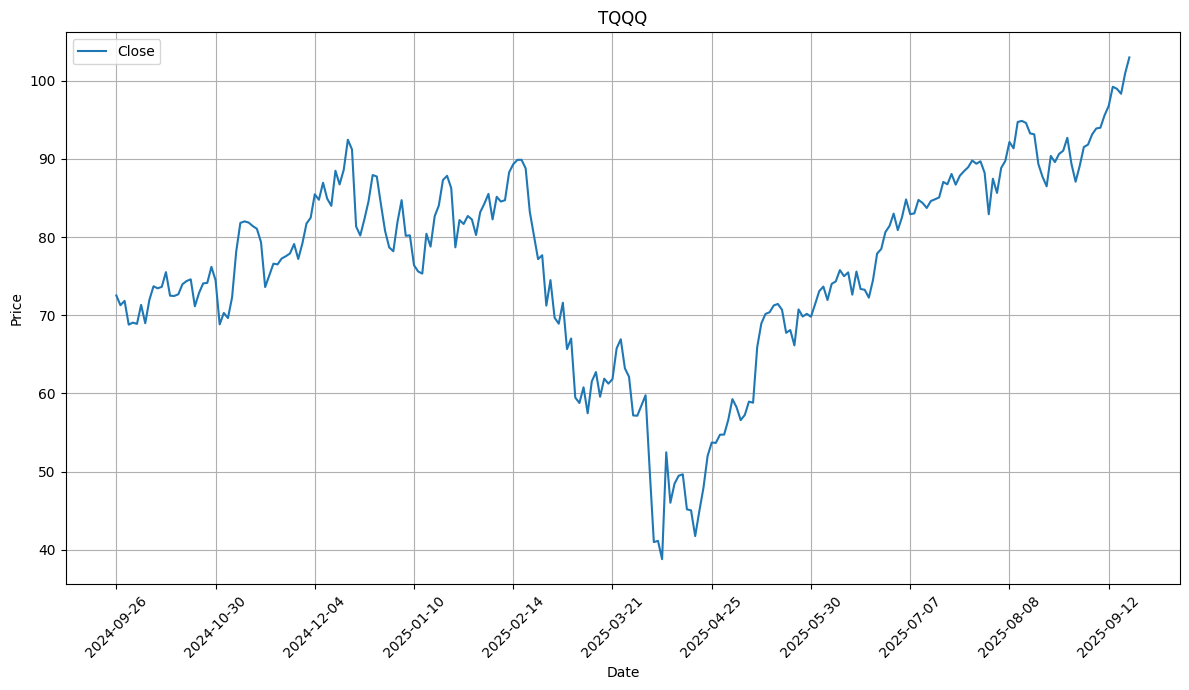

In [19]:
import matplotlib.pyplot as plt

# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Close'], label='Close')

# 設定 x 軸的時間
num = 10
date = df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,  # 設定在 x 軸上顯示標籤的位置（索引），這些位置間隔為 len(date)//num
           date[::len(date)//num],  # 設定顯示在 x 軸上的日期標籤，數量為 num，間隔為 len(date)//num
           rotation = 45) # 讓日期標籤旋轉 45 度，以避免標籤之間重疊，提高可讀性

# 設定圖表的標題，x 軸和 y 軸的標籤
plt.title(f'{stock_id}')   # 將股票代號設為圖標
plt.xlabel('Date')         # x 軸標籤
plt.ylabel('Price')  # y 軸標籤
plt.legend(loc='upper left') # 在左上角顯示圖例
plt.grid(True) # 在圖上顯示網格
plt.tight_layout()  # 自動調整圖表中的間距，避免元素之間的重疊

# 顯示圖表
plt.show()

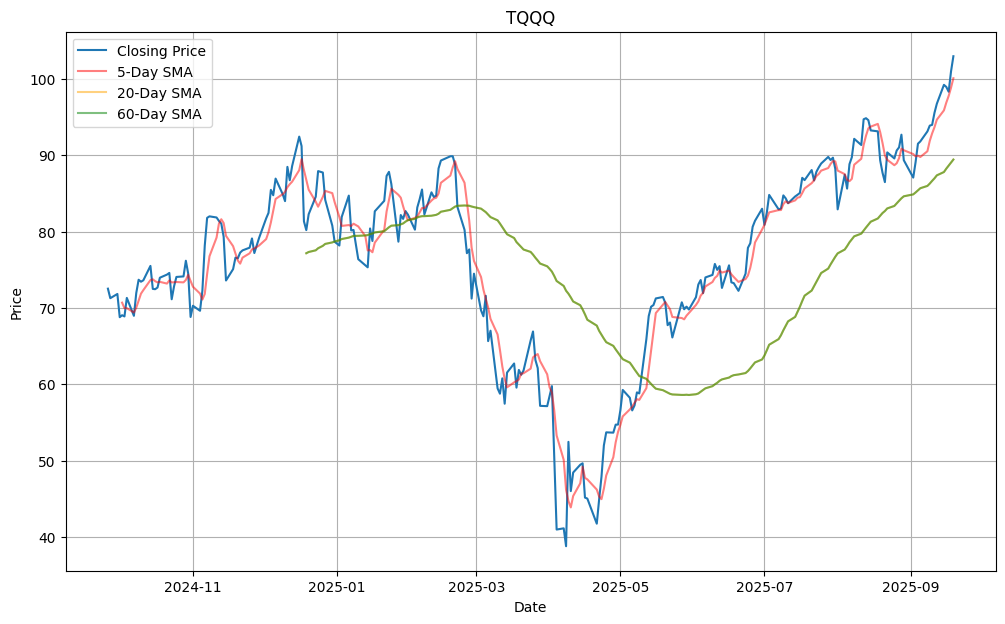

In [20]:
# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Date'], df['Close'], label='Closing Price')

# 8 天的 SMA
plt.plot(df['Date'], df['5_SMA'], label='5-Day SMA', color='red', alpha=.5)

# 13 天的 SMA
plt.plot(df['Date'], df['20_SMA'], label='20-Day SMA', color='orange', alpha=.5)

# 20 天的 SMA
plt.plot(df['Date'], df['60_SMA'], label='60-Day SMA', color='green', alpha=.5)

# 將股票代號設為圖標
plt.title(f'{stock_id}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

In [21]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.0 MB/s eta 0:00:00


In [22]:
# 將原始的 dataframe 再建立一個出來
kplot_df = df.set_index('Date')
kplot_df['2025-08-01':'2025-09-17'].tail()

Price,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,...,RS,RSI,EMA_8,EMA_13,MACD,EMA_5,EMA_20,EMA_26,5_SMA,60_SMA
Date,,,,,,,,,,,,,,,,,,,,,
2025-09-11,95.570000,95.980003,94.410004,95.190002,45623600,92.013749,91.494614,86.985180,1.580002,1.580002,...,2.416538,70.730604,92.934735,92.148239,2.156145,92.934735,92.148239,90.778590,93.679999,86.985180
2025-09-12,96.760002,97.370003,95.529999,95.959999,46117600,93.223749,92.046153,87.375269,1.190002,1.190002,...,1.995321,66.614599,93.784794,92.807062,2.563137,93.784794,92.807062,91.221658,94.667999,87.375269
2025-09-15,99.230003,99.269997,97.570000,97.639999,39057200,94.488750,92.707692,87.808187,2.470001,2.470001,...,2.715305,73.084311,94.994841,93.724625,3.179972,94.994841,93.724625,91.814868,95.888000,87.808187
2025-09-16,98.959999,99.809998,98.610001,99.669998,38568600,95.418750,93.316923,88.253391,-0.270004,0.000000,...,2.414262,70.711093,95.875987,94.472536,3.531850,95.875987,94.472536,92.344137,96.902000,88.253391
2025-09-17,98.330002,99.199997,95.510002,98.889999,73848600,96.232500,93.750000,88.650699,-0.629997,0.000000,...,2.118099,67.929176,96.421324,95.023602,3.633789,96.421324,95.023602,92.787535,97.770001,88.650699


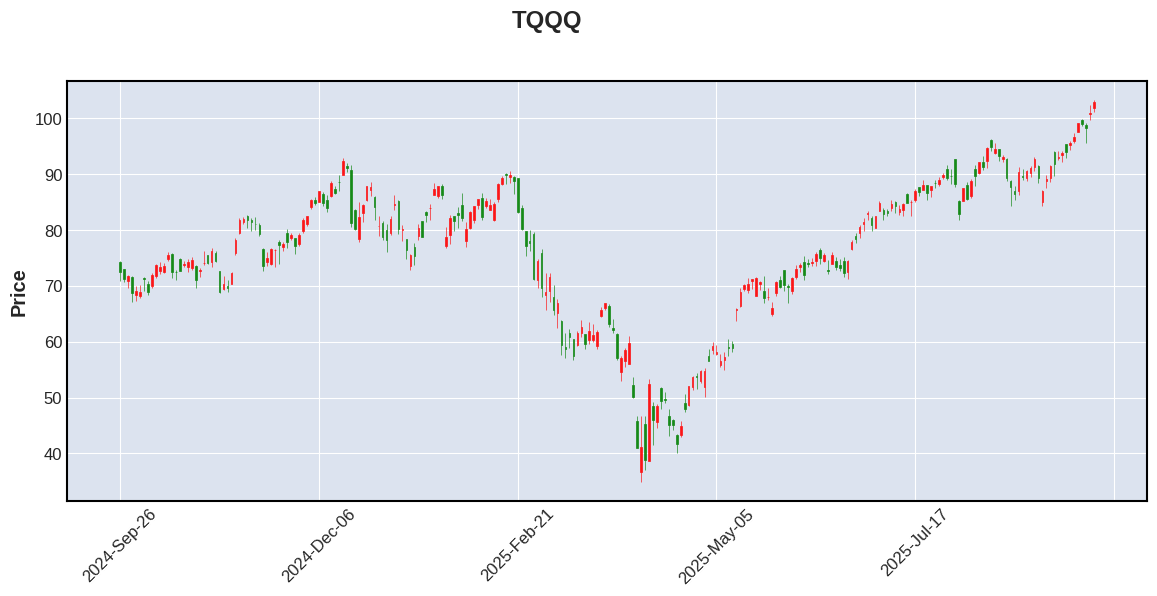

In [23]:
import mplfinance as mpf
# 設置繪圖風格
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='default',
                marketcolors=my_color)

# 使用 mplfinance 繪製 K 線圖
mpf.plot(kplot_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(15, 6))

In [24]:
# 計算 K 線長度 = abs(收盤-開盤)
df['body_length'] = abs(df['Close'] - df['Open'])

# 計算下影線長度 = abs(最高-最小)
df['lower_shadow'] = abs(df['Low'] - df[['Open', 'Close']].min(axis=1))

# 計算上影線長度 = abs(最高-最小)
df['upper_shadow'] = abs(df['High'] - df[['Open', 'Close']].max(axis=1))

#print('df',df)
# 定義 Hammer 型態的條件
hammer_condition = (
    (df['lower_shadow'] > 2 * df['body_length']) &  # 下影線長於實體的两倍
    (df['upper_shadow'] < df['body_length'] * 0.1) &  # 上影線很短
    (df['body_length'] < (df['High'] - df['Low']) * 0.4)  # 實體相對較小
)

# 提取 Hammer 型態
hammer_df = df[hammer_condition]
hammer_df.set_index('Date', inplace=True)

hammer_df

Price,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,...,EMA_13,MACD,EMA_5,EMA_20,EMA_26,5_SMA,60_SMA,body_length,lower_shadow,upper_shadow
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-29,81.669769,82.504964,79.800535,82.435365,59240600,83.827352,81.317189,81.073933,-0.507088,0.0,...,82.309377,0.378373,82.475325,82.309377,82.096952,83.324248,81.073933,0.765596,1.869235,0.069599
2025-08-20,87.709999,88.889999,84.379997,88.830002,82202100,92.372499,90.986153,82.437504,-1.629997,0.0,...,90.679816,2.174876,90.948417,90.679816,88.773542,91.609999,82.437504,1.120003,3.330002,0.059998


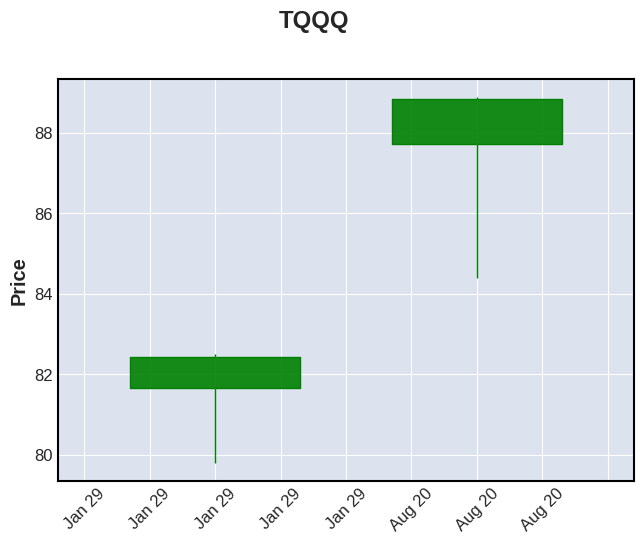

In [25]:
mpf.plot(hammer_df, type='candle', style=my_style, title=f'{stock_id}')

In [26]:
# 計算 K 線長度
df['body_length'] = abs(df['Close'] - df['Open'])

# 定義Doji型態的條件
# 一般來說，body 長度 如果 小於等於 (最高價-最低價) * 0.1
doji_condition = (
    df['body_length'] <= (df['High'] - df['Low']) * 0.1  # 中間區域非常小
)

# 提取Doji形态
doji_df = df[doji_condition]
doji_df.set_index('Date', inplace=True)

doji_df

Price,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,...,EMA_13,MACD,EMA_5,EMA_20,EMA_26,5_SMA,60_SMA,body_length,lower_shadow,upper_shadow
Date,,,,,,,,,,,,,,,,,,,,,
2024-10-04,71.320992,71.509281,69.150738,71.350720,55350200,NaN,NaN,NaN,2.427910,2.427910,...,71.074747,-1.010579,70.639110,71.074747,71.649689,69.979201,NaN,0.029728,2.170253,0.158561
2024-10-16,72.460617,72.827276,71.023688,72.579530,35392100,72.772783,71.698328,NaN,-0.039650,0.000000,...,72.447307,0.526618,72.756404,72.447307,72.229785,73.509084,NaN,0.118913,1.436929,0.247746
2024-10-24,72.837189,73.134486,71.588549,72.757908,39306400,73.068835,73.292285,NaN,1.694572,1.694572,...,72.873992,0.411231,73.004659,72.873992,72.593427,73.382233,NaN,0.079280,1.169359,0.297298
2024-10-25,74.066010,76.305631,73.719167,74.026369,57413000,73.264553,73.453891,NaN,1.228821,1.228821,...,73.044280,0.538007,73.240514,73.044280,72.702508,73.402052,NaN,0.039640,0.307202,2.239622
2024-11-13,81.052437,82.340709,79.952446,81.121805,37494500,78.524192,76.317064,NaN,-0.356750,0.000000,...,77.633622,3.529726,79.168138,77.633622,75.638412,81.625223,NaN,0.069368,1.099991,1.218904
2024-11-20,76.503830,76.593022,73.441698,76.454285,50630300,78.179825,77.639645,NaN,-0.089188,0.000000,...,76.846065,1.199434,77.013972,76.846065,75.814538,76.224370,NaN,0.049545,3.012587,0.089192
2024-12-13,88.593811,89.951452,87.057786,88.613627,39831800,86.238990,83.814228,NaN,1.863045,1.863045,...,84.334171,4.299387,85.862782,84.334171,81.563395,86.544461,NaN,0.019816,1.536025,1.337824
2024-12-30,80.794815,82.584506,78.955407,80.735153,51422000,83.631614,85.886233,78.590030,-3.380531,0.000000,...,84.570188,1.073984,84.443348,84.570188,83.369365,85.044345,78.590030,0.059662,1.779746,1.789691
2025-01-06,84.722198,86.352809,83.548953,84.483575,46025000,83.019503,83.366944,79.215856,2.793915,2.793915,...,83.067535,-0.139551,82.625695,83.067535,82.765246,80.860434,79.215856,0.238624,0.934621,1.630611


In [27]:
doji_df.index

DatetimeIndex(['2024-10-04', '2024-10-16', '2024-10-24', '2024-10-25',
               '2024-11-13', '2024-11-20', '2024-12-13', '2024-12-30',
               '2025-01-06', '2025-01-08', '2025-01-21', '2025-01-30',
               '2025-03-04', '2025-03-11', '2025-04-15', '2025-04-28',
               '2025-05-08', '2025-05-22', '2025-05-30', '2025-06-06',
               '2025-07-16', '2025-07-24', '2025-07-30', '2025-08-25',
               '2025-09-18'],
              dtype='datetime64[ns]', name='Date', freq=None)

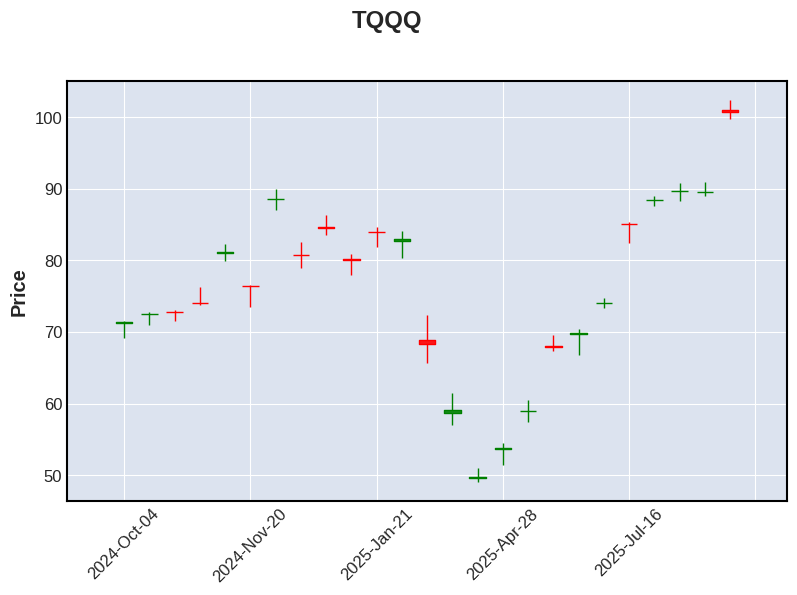

In [28]:
mpf.plot(doji_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(10, 6))

In [29]:
import numpy as np  # 引入 numpy，用於數據處理和數值運算
from sklearn.model_selection import train_test_split  # 引入 train_test_split，用於將數據集拆分為訓練集和測試集
from sklearn.metrics import mean_squared_error  # 引入 mean_squared_error 用於評估模型性能

In [30]:
# 標籤: 預測未來1天的價格，舉例說明:用技術指標預測隔天的收盤價
n = 1
df['Future_Price'] = df['Close'].shift(-n)

# 去除缺失值
df.dropna(inplace=True)

# 使用特徵
X = df[['20_SMA', 'RSI', 'MACD']]

# 標籤（未來價格）
y = df['Future_Price']

X.shape, y.shape

((186, 3), (186,))

In [31]:
# 將數據集 X 和標籤 y 拆分為訓練集和測試集
# test_size=0.2 表示測試集佔全部數據的 20% --> 80% 的資料作為訓練，20% 的資料作為測試
# shuffle=False 表示在拆分數據時不打亂原始數據的順序
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 查看拆分後訓練集和測試集的形狀
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((148, 3), (38, 3), (148,), (38,))

In [32]:
# 引入線性回歸模型
from sklearn.linear_model import LinearRegression

# 建立並訓練線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"線性回歸模型RMSE: {rmse:.2f}")

# 使用模型進行未來價格走勢預測
future_pred = model.predict(X[-1:])  # 使用最新的數據進行預測
print(f"線性回歸模型預測未來{n}天的價格: {future_pred[0]:.2f}")

線性回歸模型RMSE: 3.34
線性回歸模型預測未來1天的價格: 100.31


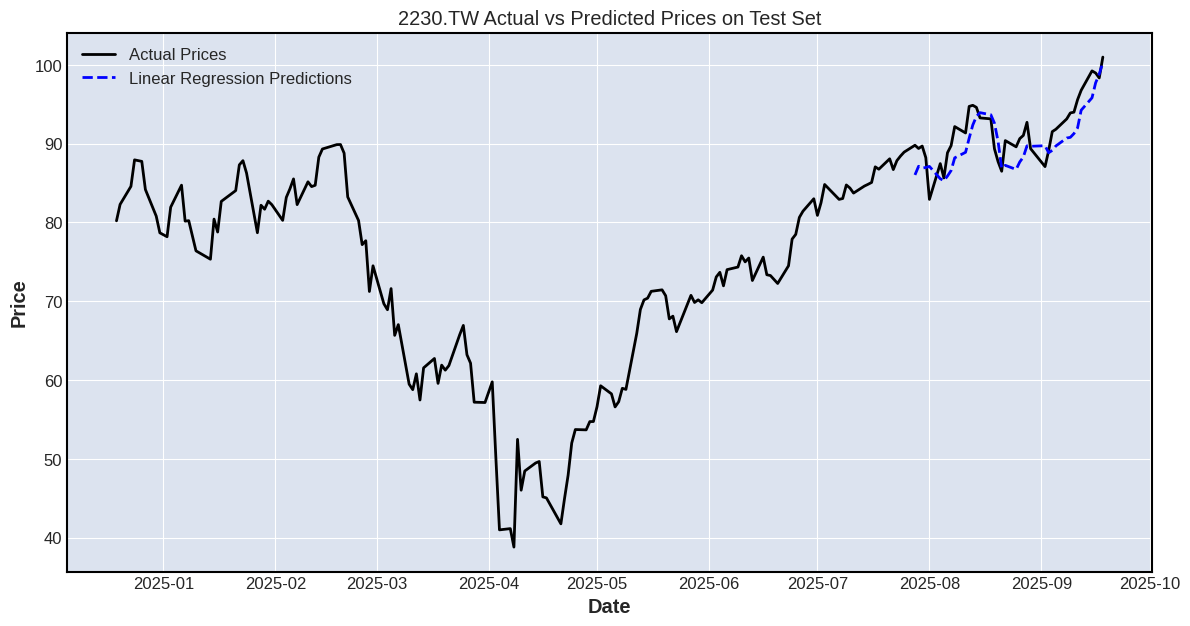

In [33]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Linear Regression Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2230.TW Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
from sklearn.tree import DecisionTreeRegressor

# 建立並訓練決策數模型
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"決策樹模型RMSE: {rmse:.2f}")

future_pred = model.predict(X[-1:])
print(f"決策樹模型預測未來{n}天的價格: {future_pred[0]:.2f}")

決策樹模型RMSE: 11.14
決策樹模型預測未來1天的價格: 83.23


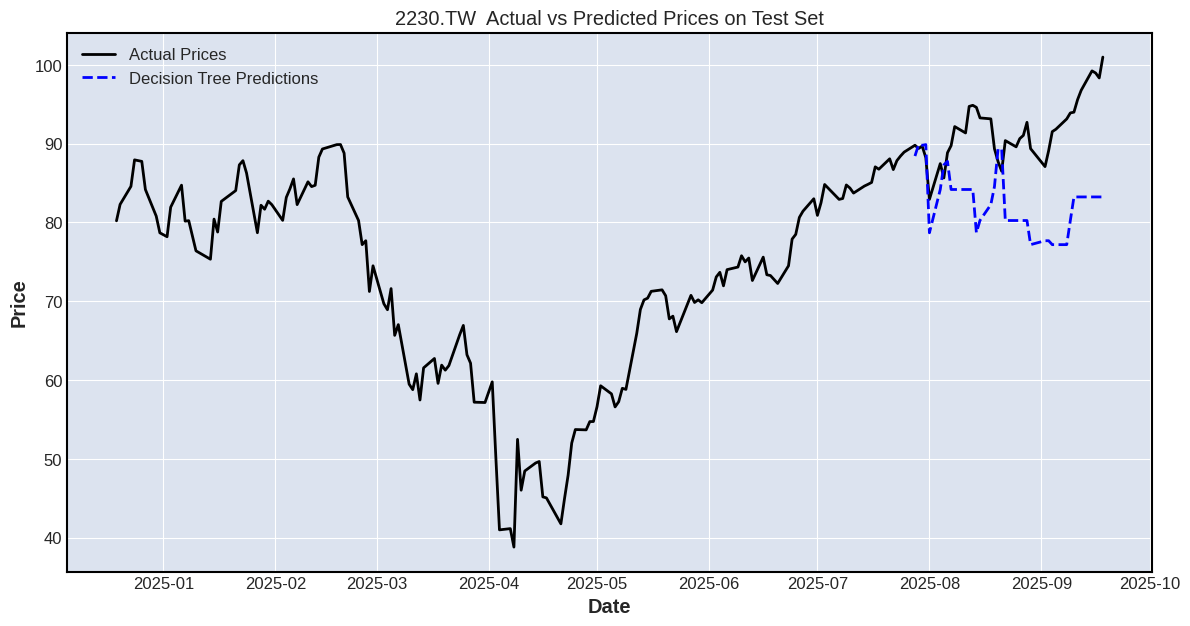

In [35]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Decision Tree Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2230.TW  Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
# 引入隨機森林模型
from sklearn.ensemble import RandomForestRegressor

# 建立並訓練決策數模型
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"隨機森林模型RMSE: {rmse:.2f}")

future_pred = model.predict(X[-1:])
print(f"隨機森林模型預測未來{n}天的價格: {future_pred[0]:.2f}")

隨機森林模型RMSE: 9.74
隨機森林模型預測未來1天的價格: 84.95


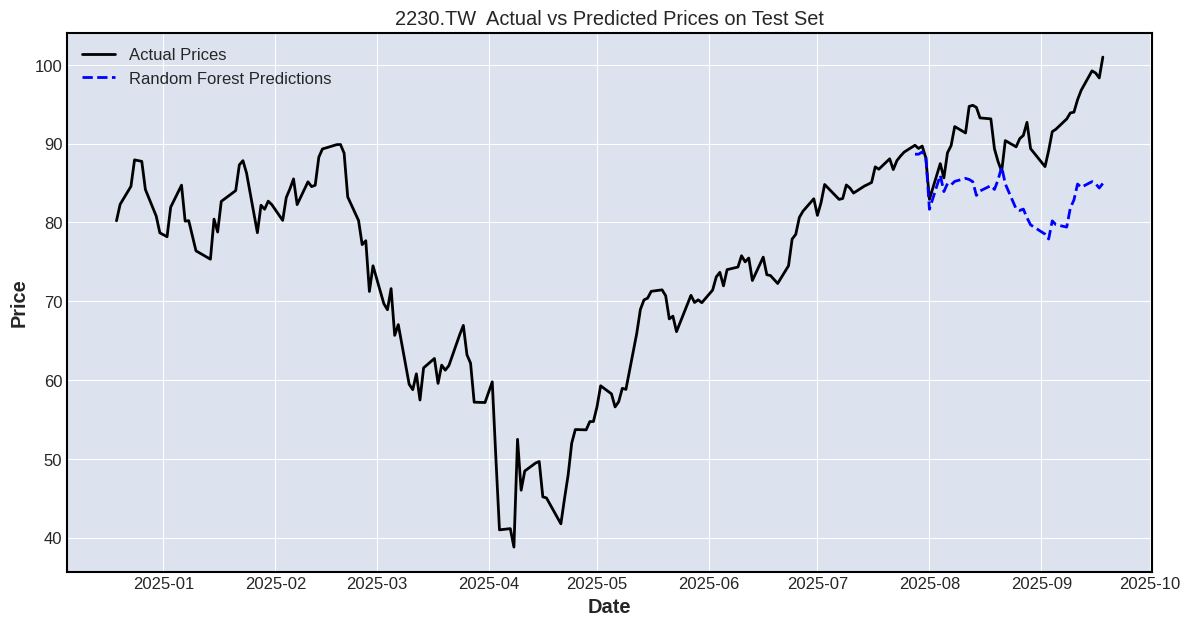

In [37]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Random Forest Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2230.TW  Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2025-09-21 08:18:44--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.212.113, 173.194.212.100, 173.194.212.102, ...
Connecting to drive.google.com (drive.google.com)|173.194.212.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-09-21 08:18:44--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.134.132, 2607:f8b0:400c:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.134.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M   124MB/s    in 0.2s    

2025-09-21 08

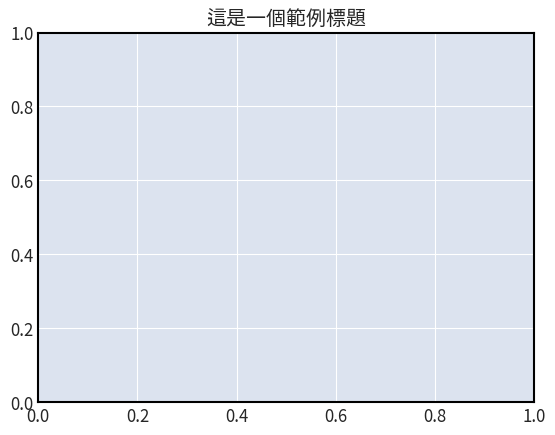

In [39]:
# 繪製範例圖表
plt.title("這是一個範例標題")
plt.show()